<a href="https://colab.research.google.com/github/PGrubisic/Racunalni_vid_labovi/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

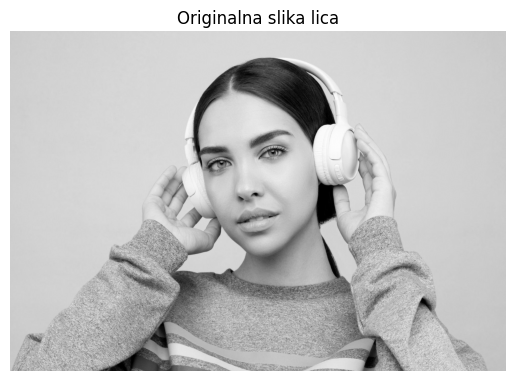

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Definiranje funkcije za prikaz slika bez dodatnih provjera
def prikazi(img, naslov=""):
    if len(img.shape) == 3:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.title(naslov)
    plt.axis('off')
    plt.show()

# Izravno učitavanje slike lica u sivoj skali
img_lice = cv.imread('/woman_portrait.jpg', cv.IMREAD_GRAYSCALE)
prikazi(img_lice, "Originalna slika lica")

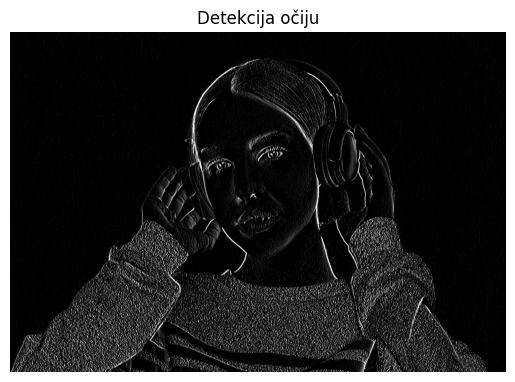

In [18]:
# Definiranje kernela za oči (iz PDF-a)
kernel_oci = np.array([[1, 1, -1, -1],
                       [1, 1, -1, -1],
                       [1, 1, -1, -1],
                       [1, 1, -1, -1]])

# Izvršavanje konvolucije za oči
img_oci = cv.filter2D(img_lice, -1, kernel_oci)
prikazi(img_oci, "Detekcija očiju")

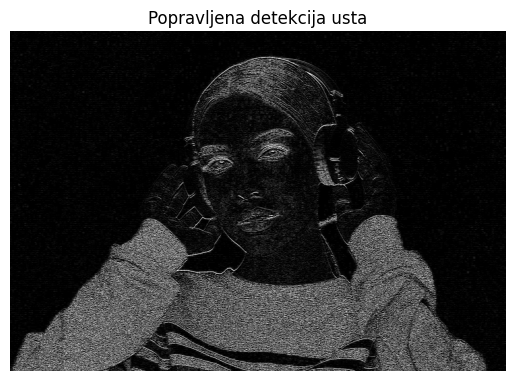

In [19]:
# Definiranje poboljšanog kernela za usta (vodoravna detekcija)
kernel_usta = np.array([
    [-1, -1, -1, -1, -1],
    [-2, -2, -2, -2, -2],
    [ 6,  6,  6,  6,  6],
    [-2, -2, -2, -2, -2],
    [-1, -1, -1, -1, -1]
])

# Izvršavanje konvolucije i normalizacija za bolju vidljivost
img_usta = cv.filter2D(img_lice, -1, kernel_usta)
img_usta_vidljivo = cv.normalize(img_usta, None, 0, 255, cv.NORM_MINMAX)

prikazi(img_usta_vidljivo, "Popravljena detekcija usta")

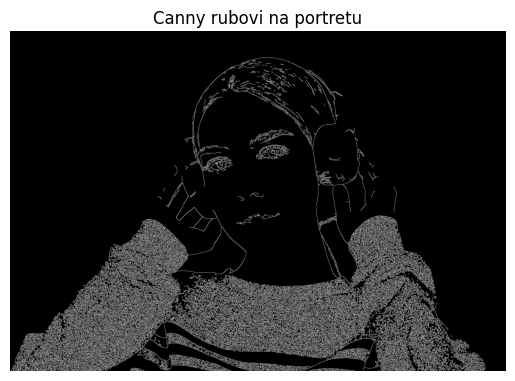

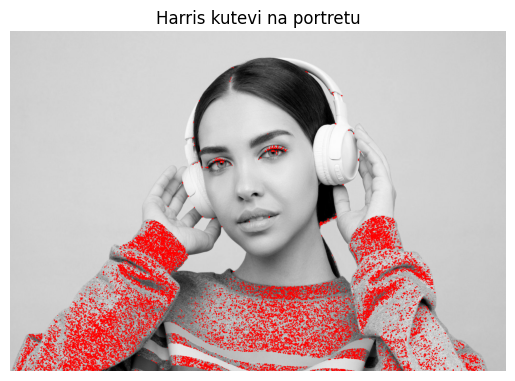

In [22]:
# 1. Canny rubovi
rubovi = cv.Canny(img_lice, 100, 200)
prikazi(rubovi, "Canny rubovi na portretu")

# 2. Harris kutevi na portretu
# Harris traži float32 format
siva_float = np.float32(img_lice)
harris_odziv = cv.cornerHarris(siva_float, 2, 3, 0.04)
harris_odziv = cv.dilate(harris_odziv, None)

# Kreiranje slike u boji da možemo ucrtati crvene točke na sivi portret
img_kutevi = cv.cvtColor(img_lice, cv.COLOR_GRAY2BGR)
img_kutevi[harris_odziv > 0.01 * harris_odziv.max()] = [0, 0, 255]

prikazi(img_kutevi, "Harris kutevi na portretu")